In [1]:
import pandas as pd
import numpy as np

# S3 경로
train_path = 's3://smwu-project-datasets/traing-dataset/rtu_data_full.csv'
val_path = 's3://smwu-project-datasets/may-dataset/rtu_ground_truth_may.csv'

In [2]:
train_df = pd.read_csv(train_path, usecols=['localtime', 'activePower','timestamp','module(equipment)','accumActiveEnergy'])
val_df=pd.read_csv(val_path)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:286: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


In [3]:
pd.set_option('display.float_format', '{:.4f}'.format)

In [1]:
import pandas as pd

# 1. 데이터 로드 및 전처리
train_df = pd.read_csv(train_path, usecols=['localtime', 'activePower', 'timestamp', 'module(equipment)', 'accumActiveEnergy'])

# 2. localtime을 datetime으로 변환
train_df['localtime'] = pd.to_datetime(train_df['localtime'], format="%Y%m%d%H%M%S")

# 3. 5초 단위 전력량 계산
train_df["energy_kWh"] = train_df["activePower"] * (5 / 3600)

# 4. 날짜 필터링: 2024-12 ~ 2025-04
train_df["year"] = train_df["localtime"].dt.year
train_df["month"] = train_df["localtime"].dt.month
train_df = train_df[((train_df["year"] == 2024) & (train_df["month"] == 12)) | 
                    ((train_df["year"] == 2025) & (train_df["month"] <= 4))]

# 5. 요금 및 탄소 배출량 계산
train_df['electricity_cost'] = train_df['energy_kWh'] * 180
train_df['carbon_emission'] = train_df['energy_kWh'] * 0.424

# 6. 인덱스로 설정 (resample 위해)
train_df = train_df.set_index("localtime")

# 7. 모듈별 1시간 단위 전력량 집계
hourly_module_energy = train_df.groupby("module(equipment)").resample("1H").agg({
    "energy_kWh": "sum"
}).reset_index()

# 8. 추가 파생 피처 생성
hourly_module_energy["hour"] = hourly_module_energy["localtime"].dt.hour
hourly_module_energy["carbon_estimated"] = hourly_module_energy["energy_kWh"] * 0.424
hourly_module_energy["bill_estimated"] = hourly_module_energy["energy_kWh"] * 180

# 9. 확인
print(hourly_module_energy.head())
print(hourly_module_energy.tail())


NameError: name 'train_path' is not defined

In [3]:
# train_df["localtime"] = pd.to_datetime(train_df["localtime"], format="%Y%m%d%H%M%S")

# # 5초당 전력량 계산 (kWh)
# train_df["energy_kWh"] = train_df["activePower"] * (5 / 3600)

# # 월별 필터링 (2024-12 ~ 2025-04)
# train_df["year"] = train_df["localtime"].dt.year
# train_df["month"] = train_df["localtime"].dt.month
# train_df = train_df[(train_df["year"] == 2024) & (train_df["month"] ==12) | (train_df["year"] == 2025) & (train_df["month"] <=4)]
# #요금 및 탄소 배출량 계산
# train_df['electricity_cost'] =(train_df['energy_kWh'] * 180)
# train_df['carbon_emission'] = train_df['energy_kWh'] * 0.424
# train_df

,module(equipment),timestamp,localtime,activePower,accumActiveEnergy,energy_kWh,year,month,electricity_cost,carbon_emission
0,1(PM-3),1733040000000,2024-12-01 00:00:00,2961.61,1955004,4.113347,2024,12,740.4025,1.744059
1,1(PM-3),1733040005000,2024-12-01 00:00:05,3017.48,1955008,4.190944,2024,12,754.3700,1.776960
2,1(PM-3),1733040010000,2024-12-01 00:00:10,2408.01,1955011,3.344458,2024,12,602.0025,1.418050
3,1(PM-3),1733040015000,2024-12-01 00:00:15,3289.33,1955016,4.568514,2024,12,822.3325,1.937050
4,1(PM-3),1733040020000,2024-12-01 00:00:20,3069.31,1955020,4.262931,2024,12,767.3275,1.807483
...,...,...,...,...,...,...,...,...,...,...
33696008,18(우측분전반2),1745996380000,2025-04-29 23:59:40,2239.82,15438157,3.110861,2025,4,559.9550,1.319005
33696009,18(우측분전반2),1745996385000,2025-04-29 23:59:45,2690.21,15438161,3.736403,2025,4,672.5525,1.584235
33696010,18(우측분전반2),1745996390000,2025-04-29 23:59:50,2174.37,15438164,3.019958,2025,4,543.5925,1.280462
33696011,18(우측분전반2),1745996395000,2025-04-29 23:59:55,2437.68,15438167,3.385667,2025,4,609.4200,1.435523


In [8]:
# localtime을 datetime으로 변환
train_df['localtime'] = pd.to_datetime(train_df['localtime'], format="%Y%m%d%H%M%S")

# 인덱스로 설정
train_df = train_df.set_index("localtime")

# 1시간 단위로 전력량 집계 (on="localtime" 제거)
hourly_energy = train_df.resample("1H").agg({
    "energy_kWh": "sum"
}).reset_index()

# 추가 피처 생성
hourly_energy['hour'] = hourly_energy["localtime"].dt.hour
hourly_energy['carbon_estimated'] = hourly_energy['energy_kWh'] * 0.424
hourly_energy['bill_estimated'] = hourly_energy['energy_kWh'] * 180

hourly_energy.head()


KeyError: 'localtime'

In [10]:
train_df.columns

Index(['module(equipment)', 'timestamp', 'activePower', 'accumActiveEnergy',
       'energy_kWh', 'year', 'month', 'electricity_cost', 'carbon_emission'],
      dtype='object')

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarni

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=56975.944, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=86378.694, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.66 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=56976.648, Time=1.81 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=56975.823, Time=1.38 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=56976.644, Time=0.73 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.31 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=56972.244, Time=2.21 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.55 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=56974.330, Time=2.42 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=56978.606, Time=1.44 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.81 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0]             : AIC=56984.115, Time=2.18 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=56958.250, Time=0.69 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=56956.779, Time=0.29 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=56959.993, Time=0.25 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=56955.014, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=56958.233, Time=0.17 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=56956.058, Time=0.54 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 17.908 seconds


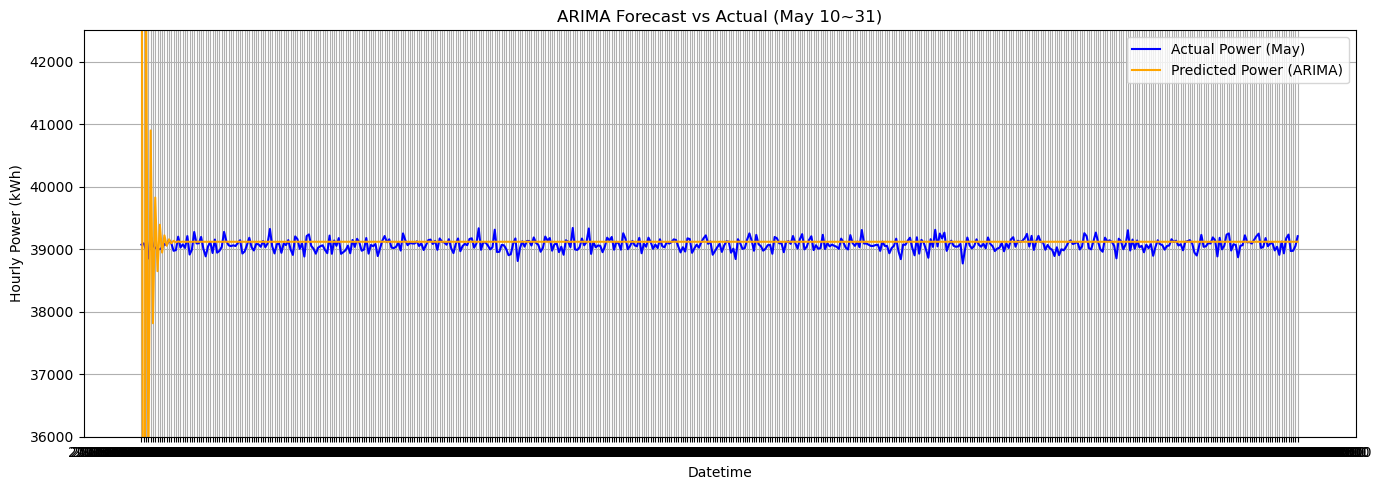

In [6]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# 1. 시계열 데이터 준비
ts_energy = hourly_energy['energy_kWh'].dropna()

# 2. ARIMA 파라미터 자동 선택
stepwise_model = auto_arima(ts_energy,
                             seasonal=False,
                             trace=True,
                             suppress_warnings=True)

# 3. ARIMA 학습
model = ARIMA(ts_energy, order=stepwise_model.order)
model_fit = model.fit()

# 4. 검증 구간 길이만큼 예측 (5월 10~31일은 약 528시간)
n_forecast = len(val_df)
forecast = model_fit.forecast(steps=n_forecast)

# 5. 예측값 저장
val_df['pow_pred'] = forecast.values

# 6. 시각화
plt.figure(figsize=(14, 5))
plt.plot(val_df['id'], val_df['hourly_pow'], label='Actual Power (May)', color='blue')
plt.plot(val_df['id'], val_df['pow_pred'], label='Predicted Power (ARIMA)', color='orange')
plt.title("ARIMA Forecast vs Actual (May 10~31)")
plt.xlabel("Datetime")
plt.ylabel("Hourly Power (kWh)")
plt.legend()
plt.grid(True)
plt.ylim([36000, 42500])
plt.tight_layout()
plt.show()

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. NaN 제거 (필요 시)
val_clean = val_df.dropna(subset=['hourly_pow', 'pow_pred'])

# 2. MAE, RMSE 계산
mae = mean_absolute_error(val_clean['hourly_pow'], val_clean['pow_pred'])
rmse = np.sqrt(mean_squared_error(val_clean['hourly_pow'], val_clean['pow_pred']))

# 3. 출력
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

MAE: 144.012
RMSE: 674.080


Performing stepwise search to minimize aic


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarni

 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=inf, Time=9.49 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=56959.252, Time=0.07 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=inf, Time=15.55 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=56960.409, Time=1.23 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=86378.694, Time=0.05 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,0)[24] intercept   : AIC=56961.923, Time=3.64 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,1)[24] intercept   : AIC=56960.168, Time=0.85 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,1)[24] intercept   : AIC=inf, Time=4.83 sec
 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=56958.233, Time=0.17 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,1)[24] intercept   : AIC=56960.233, Time=1.16 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[24] intercept   : AIC=inf, Time=12.97 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[24] intercept   : AIC=56955.014, Time=0.25 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,0,0)[24] intercept   : AIC=inf, Time=6.41 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,1)[24] intercept   : AIC=56957.014, Time=1.21 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,0,1)[24] intercept   : AIC=inf, Time=7.72 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[24] intercept   : AIC=56956.058, Time=0.56 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[24] intercept   : AIC=56956.779, Time=0.31 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[24] intercept   : AIC=56959.993, Time=0.26 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[24] intercept   : AIC=56958.250, Time=0.69 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[24]             : AIC=inf, Time=0.31 sec

Best model:  ARIMA(2,0,0)(0,0,0)[24] intercept
Total fit time: 67.769 seconds


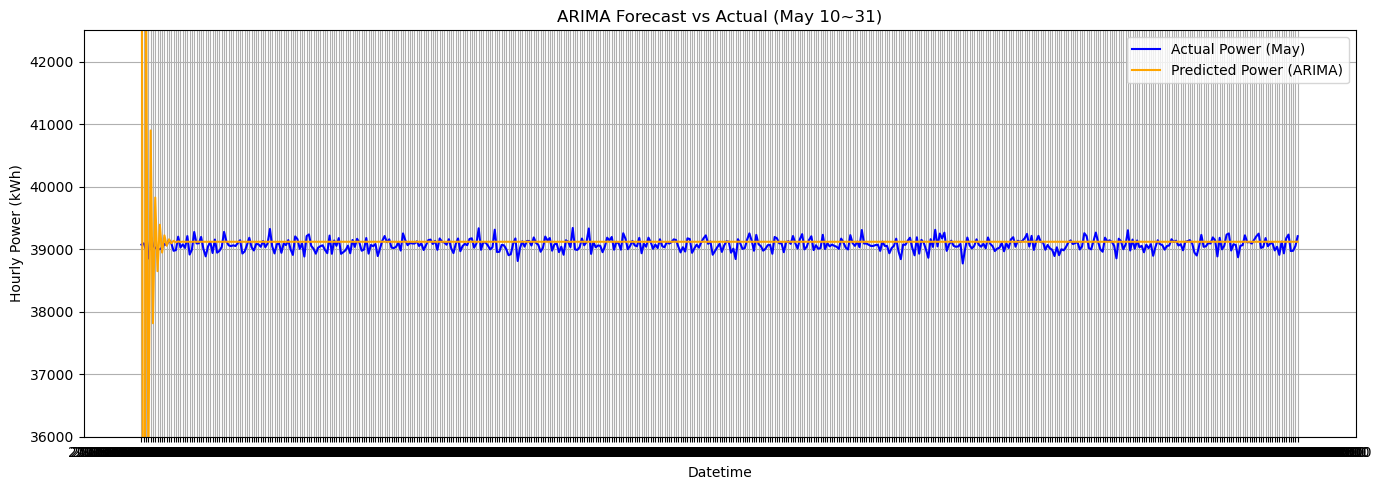

In [8]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# 1. 시계열 데이터 준비
ts_energy = hourly_energy['energy_kWh'].dropna()

# 2. ARIMA 파라미터 자동 선택
stepwise_model = auto_arima(ts_energy,
                             seasonal=True,
                             m=24,  # 하루 단위 주기(24시간 주기)로 계절성 반영-> 뚜렷한 트렌드가 없다면 LSTM사용이 적절
                             trace=True,
                             suppress_warnings=True)

# 3. ARIMA 학습
model = ARIMA(ts_energy, order=stepwise_model.order)
model_fit = model.fit()

# 4. 검증 구간 길이만큼 예측 (5월 10~31일은 약 528시간)
n_forecast = len(val_df)
forecast = model_fit.forecast(steps=n_forecast)

# 5. 예측값 저장
val_df['pow_pred2'] = forecast.values

# 6. 시각화
plt.figure(figsize=(14, 5))
plt.plot(val_df['id'], val_df['hourly_pow'], label='Actual Power (May)', color='blue')
plt.plot(val_df['id'], val_df['pow_pred2'], label='Predicted Power (ARIMA)', color='orange')
plt.title("ARIMA Forecast vs Actual (May 10~31)")
plt.xlabel("Datetime")
plt.ylabel("Hourly Power (kWh)")
plt.legend()
plt.grid(True)
plt.ylim([36000, 42500])
plt.tight_layout()
plt.show()

In [9]:
val_df['bill_pred'] = val_df['pow_pred2'] * 180
val_df['carbon_pred'] = val_df['pow_pred2'] * 0.424

In [10]:
val_df['id'] = pd.to_datetime(val_df['id'])
# localtime 컬럼이 datetime 형식이어야 함
val_df['id'] = val_df['id'].dt.date  # 또는 dt.floor('D')로도 가능

# 예: 일별 전력요금 합계
daily_val = val_df.groupby('id')[['bill_pred','may_bill']].sum().reset_index()

# 또는 일별 전력량 평균
# daily_val = val_df.groupby('date')['hourly_pow'].mean().reset_index()

# 확인
print(daily_val.head())

           id      bill_pred       may_bill
0  2025-05-10 168507528.9081 168730295.7621
1  2025-05-11 168992047.8729 168747406.4781
2  2025-05-12 168992035.9145 168735286.4518
3  2025-05-13 168992035.9144 168715337.9838
4  2025-05-14 168992035.9144 168785084.3037


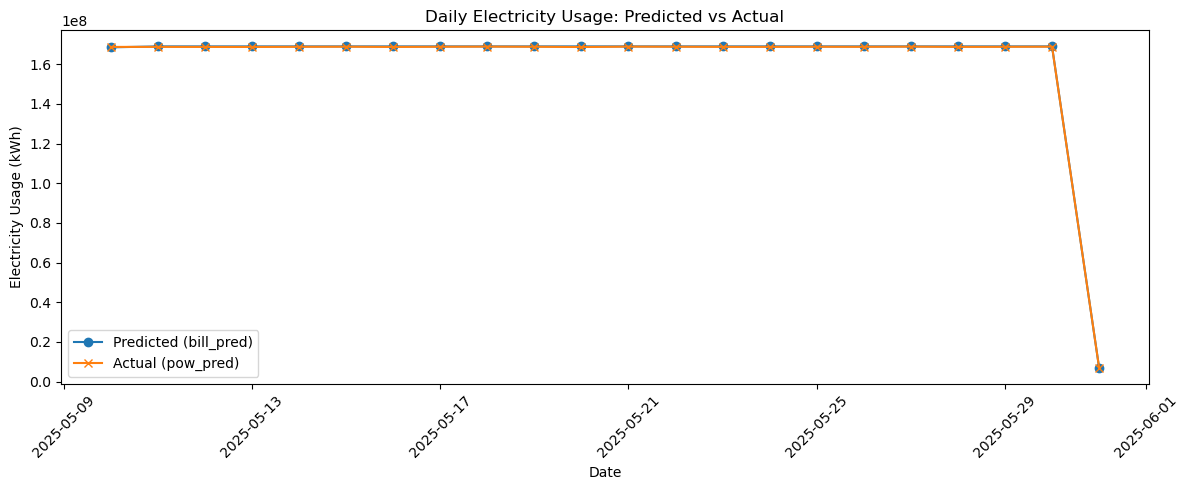

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(daily_val['id'], daily_val['bill_pred'], label='Predicted (bill_pred)', marker='o')
plt.plot(daily_val['id'], daily_val['may_bill'], label='Actual (pow_pred)', marker='x')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Electricity Usage (kWh)')
plt.title('Daily Electricity Usage: Predicted vs Actual')
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
daily_carbon = val_df.groupby('id')[['carbon_pred', 'may_carbon']].sum().reset_index()

print(daily_carbon.head())

           id  carbon_pred  may_carbon
0  2025-05-10  396928.8459 397453.5856
1  2025-05-11  398070.1572 397493.8908
2  2025-05-12  398070.1290 397465.3414
3  2025-05-13  398070.1290 397418.3517
4  2025-05-14  398070.1290 397582.6430


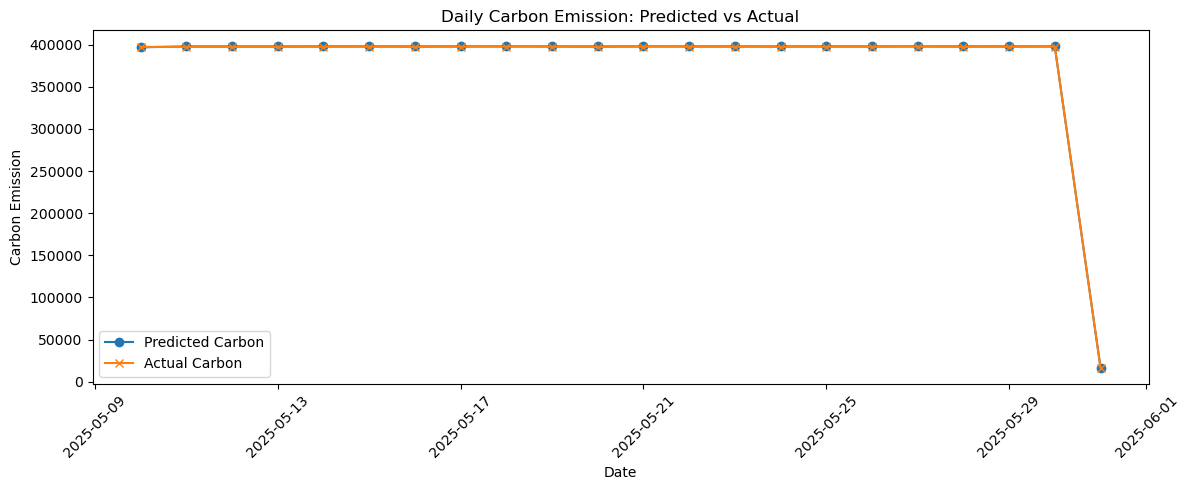

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(daily_carbon['id'], daily_carbon['carbon_pred'], label='Predicted Carbon', marker='o')
plt.plot(daily_carbon['id'], daily_carbon['may_carbon'], label='Actual Carbon', marker='x')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Carbon Emission')
plt.title('Daily Carbon Emission: Predicted vs Actual')
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
# 1. localtime을 datetime으로 변환 (인덱스일 경우)
if 'localtime' in train_df.columns:
    train_df['localtime'] = pd.to_datetime(train_df['localtime'], format="%Y%m%d%H%M%S")
    train_df = train_df.set_index("localtime")
else:
    train_df.index = pd.to_datetime(train_df.index, format="%Y%m%d%H%M%S")

# 2. 모듈별 1시간 단위 전력량 집계
hourly_module_energy = train_df.groupby("module(equipment)").resample("1H").agg({
    "energy_kWh": "sum"
}).reset_index()

# 3. 파생 피처 생성
hourly_module_energy["hour"] = hourly_module_energy["localtime"].dt.hour
hourly_module_energy["carbon_estimated"] = hourly_module_energy["energy_kWh"] * 0.424
hourly_module_energy["bill_estimated"] = hourly_module_energy["energy_kWh"] * 180

# 결과 확인
hourly_module_energy.head()


,module(equipment),localtime,energy_kWh,hour,carbon_estimated,bill_estimated
0,1(PM-3),2024-12-01 00:00:00,3011.903014,0,1277.046878,542142.5425
1,1(PM-3),2024-12-01 01:00:00,3011.384833,1,1276.827169,542049.2700
2,1(PM-3),2024-12-01 02:00:00,2990.481861,2,1267.964309,538286.7350
3,1(PM-3),2024-12-01 03:00:00,3003.309125,3,1273.403069,540595.6425
4,1(PM-3),2024-12-01 04:00:00,3007.081417,4,1275.002521,541274.6550


In [2]:
train_path = 's3://smwu-project-datasets/traing-dataset/rtu_data_full.csv'
val_path = 's3://smwu-project-datasets/may-dataset/rtu_ground_truth_may.csv'

In [3]:
import pandas as pd

# 1. 데이터 로드 및 전처리
train_df = pd.read_csv(train_path, usecols=['localtime', 'activePower', 'timestamp', 'module(equipment)', 'accumActiveEnergy'])

# 2. localtime을 datetime으로 변환
train_df['localtime'] = pd.to_datetime(train_df['localtime'], format="%Y%m%d%H%M%S")

# 3. 5초 단위 전력량 계산
train_df["energy_kWh"] = train_df["activePower"] * (5 / 3600)

# 4. 날짜 필터링: 2024-12 ~ 2025-04
train_df["year"] = train_df["localtime"].dt.year
train_df["month"] = train_df["localtime"].dt.month
train_df = train_df[((train_df["year"] == 2024) & (train_df["month"] == 12)) | 
                    ((train_df["year"] == 2025) & (train_df["month"] <= 4))]

# 5. 요금 및 탄소 배출량 계산
train_df['electricity_cost'] = train_df['energy_kWh'] * 180
train_df['carbon_emission'] = train_df['energy_kWh'] * 0.424

# 6. 인덱스로 설정 (resample 위해)
train_df = train_df.set_index("localtime")

# 7. 모듈별 1시간 단위 전력량 집계
hourly_module_energy = train_df.groupby("module(equipment)").resample("1H").agg({
    "energy_kWh": "sum"
}).reset_index()

# 8. 추가 파생 피처 생성
hourly_module_energy["hour"] = hourly_module_energy["localtime"].dt.hour
hourly_module_energy["carbon_estimated"] = hourly_module_energy["energy_kWh"] * 0.424
hourly_module_energy["bill_estimated"] = hourly_module_energy["energy_kWh"] * 180

# 9. 확인
print(hourly_module_energy.head())
print(hourly_module_energy.tail())


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:286: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


  module(equipment)           localtime   energy_kWh  hour  carbon_estimated  \
0           1(PM-3) 2024-12-01 00:00:00  3011.903014     0       1277.046878   
1           1(PM-3) 2024-12-01 01:00:00  3011.384833     1       1276.827169   
2           1(PM-3) 2024-12-01 02:00:00  2990.481861     2       1267.964309   
3           1(PM-3) 2024-12-01 03:00:00  3003.309125     3       1273.403069   
4           1(PM-3) 2024-12-01 04:00:00  3007.081417     4       1275.002521   

   bill_estimated  
0     542142.5425  
1     542049.2700  
2     538286.7350  
3     540595.6425  
4     541274.6550  
      module(equipment)           localtime   energy_kWh  hour  \
46808          5(좌측분전반) 2025-04-29 20:00:00  3020.030861    20   
46809          5(좌측분전반) 2025-04-29 21:00:00  2989.681444    21   
46810          5(좌측분전반) 2025-04-29 22:00:00  3002.482986    22   
46811          5(좌측분전반) 2025-04-29 23:00:00  3075.400069    23   
46812          5(좌측분전반) 2025-04-30 00:00:00     3.404292     0   

  

In [5]:
# 인덱스는 이미 설정됨 (train_df)
hourly_energy = train_df.resample("1H").agg({
    "energy_kWh": "sum"
}).reset_index()

# 파생 피처
hourly_energy['hour'] = hourly_energy["localtime"].dt.hour
hourly_energy['carbon_estimated'] = hourly_energy['energy_kWh'] * 0.424
hourly_energy['bill_estimated'] = hourly_energy['energy_kWh'] * 180


In [7]:
# # 1. localtime을 datetime으로 변환
# train_df['localtime'] = pd.to_datetime(train_df['localtime'], format="%Y%m%d%H%M%S")

# # 먼저 시간 인덱스를 설정 (resample을 위해)
# train_df = train_df.set_index("localtime")

# # 모듈별 1시간 단위 전력량 집계
# hourly_module_energy = train_df.groupby("module(equipment)").resample("1H").agg({
#     "energy_kWh": "sum"
# }).reset_index()

# # 추가 피처 생성
# hourly_module_energy["hour"] = hourly_module_energy["localtime"].dt.hour
# hourly_module_energy["carbon_estimated"] = hourly_module_energy["energy_kWh"] * 0.424
# hourly_module_energy["bill_estimated"] = hourly_module_energy["energy_kWh"] * 180
# hourly_module_energy.head()

KeyError: 'localtime'

In [5]:
# hourly_energy['localtime'] = pd.to_datetime(hourly_energy['localtime'])
# hourly_energy.set_index('localtime', inplace=True)

# # 2024-12-01 00:00 부터 2025-04-30 00:00 까지 데이터 존재해야 함
# print(hourly_energy.head())
# print(hourly_energy.tail())

NameError: name 'hourly_energy' is not defined

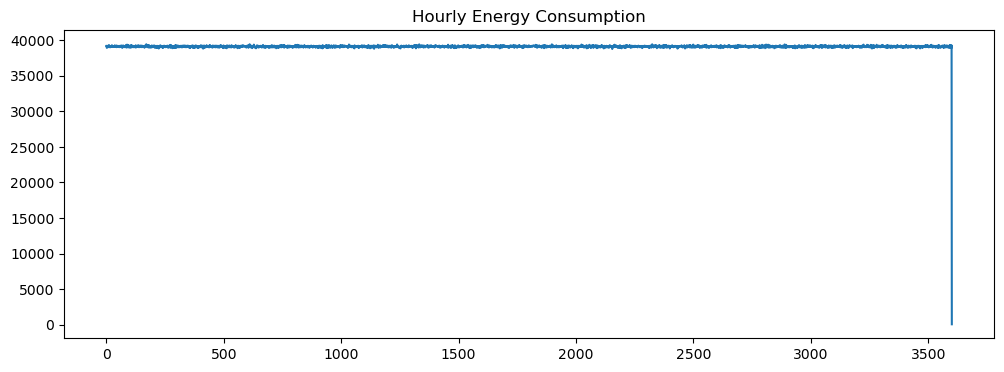

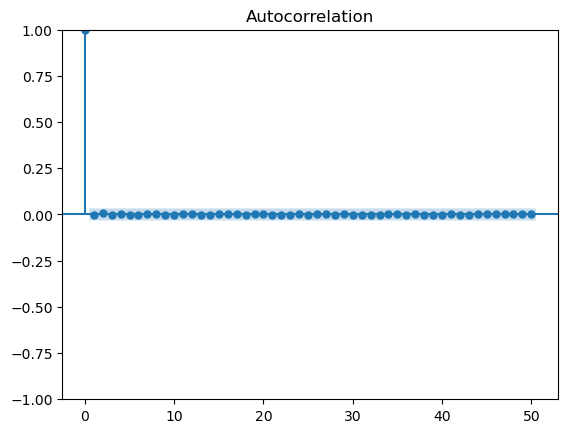

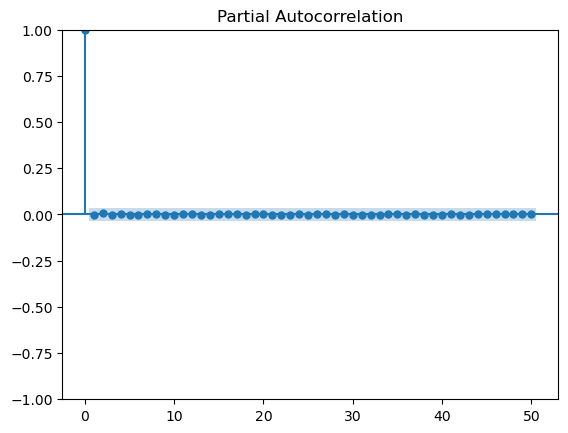

In [6]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

plt.figure(figsize=(12,4))
plt.plot(hourly_energy['energy_kWh'])
plt.title('Hourly Energy Consumption')
plt.show()

# ACF, PACF 그려보기 -> ACF와 PACF가 급격히 떨어지는 지점을 p,q로 선정해야하는데 그런 지점이 없음
plot_acf(hourly_energy['energy_kWh'], lags=50)
plot_pacf(hourly_energy['energy_kWh'], lags=50)
plt.show()


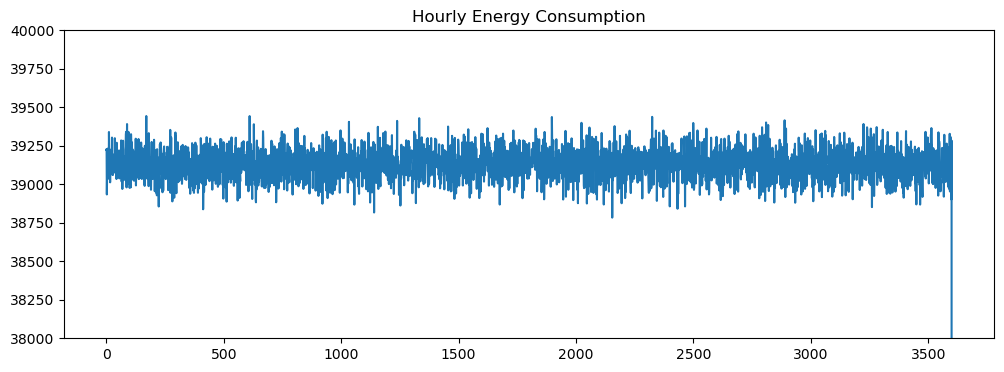

In [9]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

plt.figure(figsize=(12,4))
plt.plot(hourly_energy['energy_kWh'])
plt.title('Hourly Energy Consumption')
plt.ylim(38000, 40000)  # x축 범위 제한
plt.show()


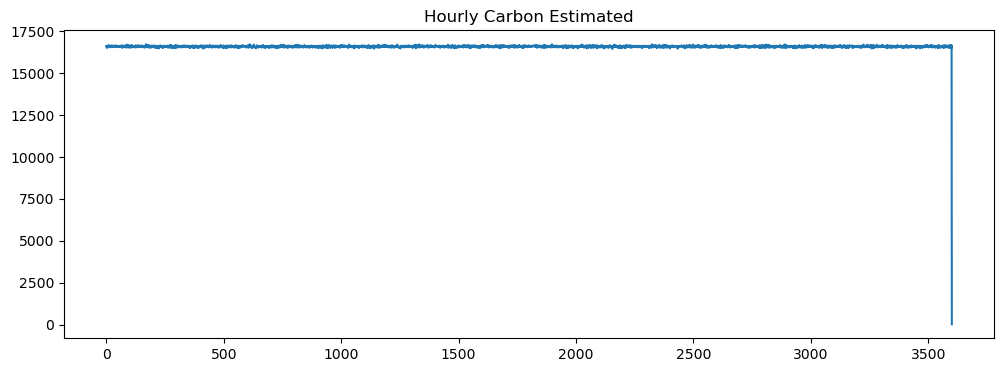

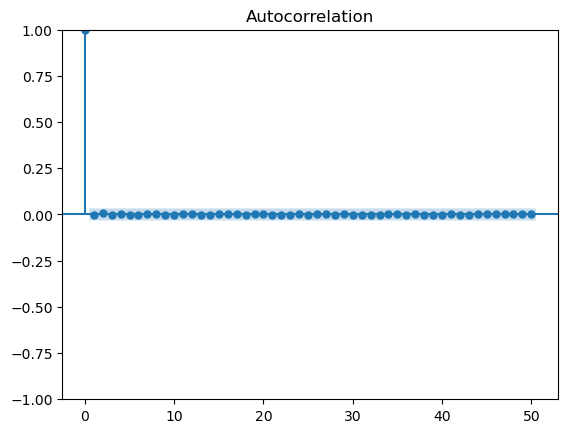

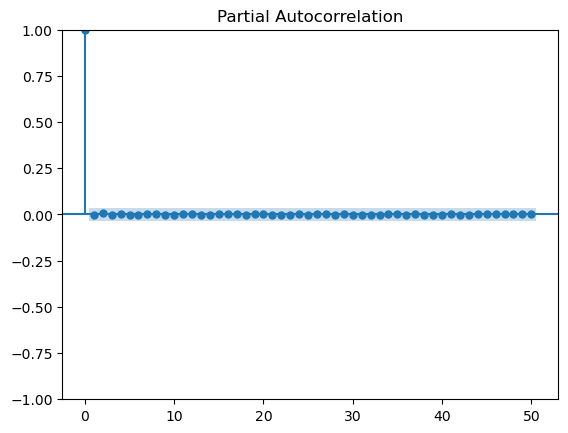

In [10]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

plt.figure(figsize=(12,4))
plt.plot(hourly_energy['carbon_estimated'])
plt.title('Hourly Carbon Estimated')
plt.show()

# ACF, PACF 그려보기 -> ACF와 PACF가 급격히 떨어지는 지점을 p,q로 선정해야하는데 그런 지점이 없음
plot_acf(hourly_energy['carbon_estimated'], lags=50)
plot_pacf(hourly_energy['energy_kWh'], lags=50)
plt.show()


In [16]:
val_df=pd.read_csv(val_path)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarni

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=56975.944, Time=1.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=86378.694, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.68 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=56976.648, Time=1.87 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=56975.823, Time=1.41 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=56976.644, Time=0.75 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.31 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=56972.244, Time=2.27 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.56 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=56974.330, Time=2.47 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=56978.606, Time=1.49 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.81 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0]             : AIC=56984.115, Time=2.24 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=56958.250, Time=0.71 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=56956.779, Time=0.30 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=56959.993, Time=0.26 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=56955.014, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=56958.233, Time=0.17 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=56956.058, Time=0.56 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 18.374 seconds


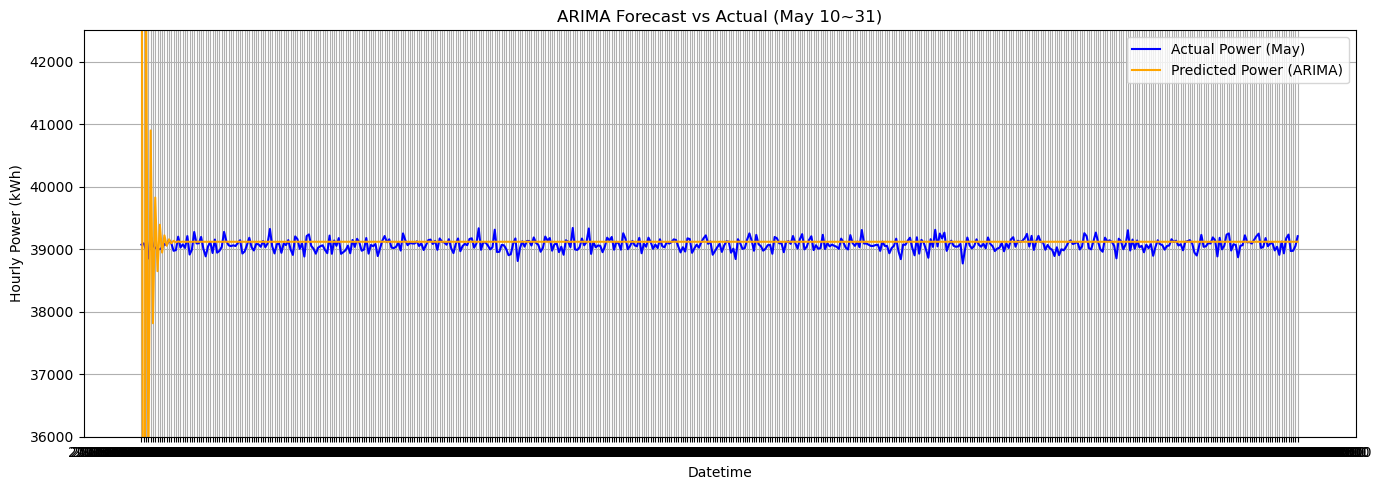

In [17]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# 1. 시계열 데이터 준비
ts_energy = hourly_energy['energy_kWh'].dropna()

# 2. ARIMA 파라미터 자동 선택
stepwise_model = auto_arima(ts_energy,
                             seasonal=False,
                             trace=True,
                             suppress_warnings=True)

# 3. ARIMA 학습
model = ARIMA(ts_energy, order=stepwise_model.order)
model_fit = model.fit()

# 4. 검증 구간 길이만큼 예측 (5월 10~31일은 약 528시간)
n_forecast = len(val_df)
forecast = model_fit.forecast(steps=n_forecast)

# 5. 예측값 저장
val_df['pow_pred'] = forecast.values

# 6. 시각화
plt.figure(figsize=(14, 5))
plt.plot(val_df['id'], val_df['hourly_pow'], label='Actual Power (May)', color='blue')
plt.plot(val_df['id'], val_df['pow_pred'], label='Predicted Power (ARIMA)', color='orange')
plt.title("ARIMA Forecast vs Actual (May 10~31)")
plt.xlabel("Datetime")
plt.ylabel("Hourly Power (kWh)")
plt.legend()
plt.grid(True)
plt.ylim([36000, 42500])
plt.tight_layout()
plt.show()

In [19]:
val_df.head()

,id,hourly_pow,may_bill,may_carbon,agg_pow,pow_pred,carbon_pred
0,2025-05-10 00:00:00,39072.258992,7.033007e+06,16566.637813,1.973105e+07,46644.375266,19777.043212
1,2025-05-10 01:00:00,39092.605158,7.036669e+06,16575.264587,1.973105e+07,27635.574708,11717.695385
2,2025-05-10 02:00:00,38988.350044,7.017903e+06,16531.060419,1.973105e+07,43252.755996,18339.004709
3,2025-05-10 03:00:00,38851.406614,6.993253e+06,16472.996405,1.973105e+07,35374.921398,14999.112919
4,2025-05-10 04:00:00,39227.069973,7.060873e+06,16632.277669,1.973105e+07,40898.356895,17340.800628


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarni

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=50796.412, Time=1.95 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=80199.220, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.64 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=50797.187, Time=1.81 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=50796.268, Time=1.79 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=50796.955, Time=0.91 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.32 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=50792.913, Time=1.53 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.78 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=50793.945, Time=2.60 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(3,0,2)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()

 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.83 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0]             : AIC=50804.631, Time=2.31 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=50778.777, Time=0.71 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=50777.306, Time=0.31 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=50780.519, Time=0.26 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=50775.541, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=50778.760, Time=0.18 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=50776.585, Time=0.56 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 18.984 seconds


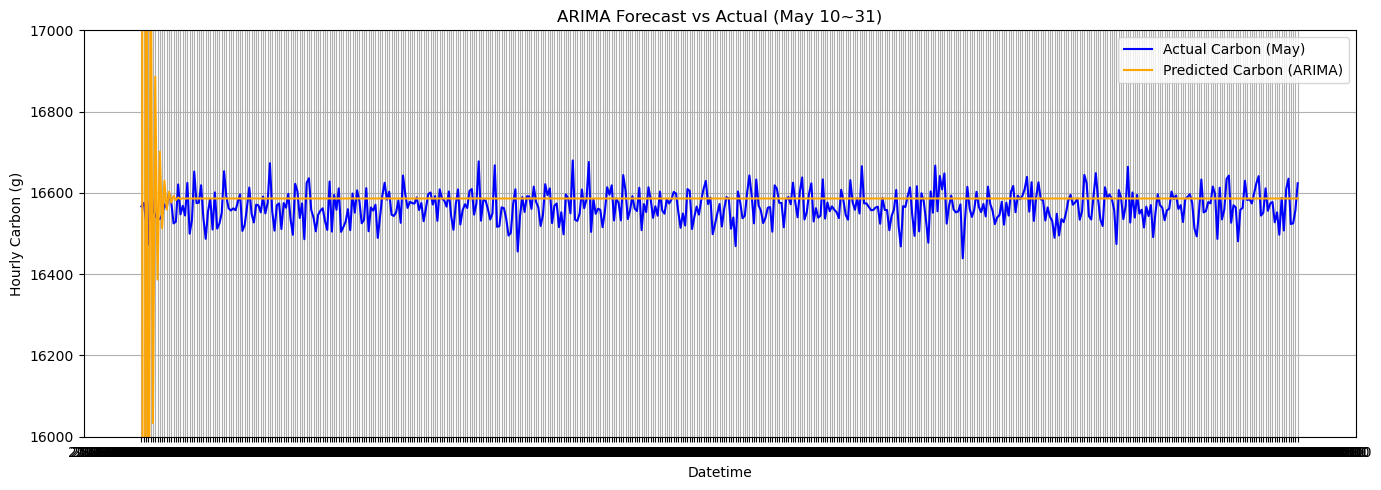

In [21]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# 1. 시계열 데이터 준비
ts_carbon = hourly_energy['carbon_estimated'].dropna()

# 2. ARIMA 파라미터 자동 선택
stepwise_model = auto_arima(ts_carbon,
                             seasonal=False,
                             trace=True,
                             suppress_warnings=True)

# 3. ARIMA 학습
model = ARIMA(ts_carbon, order=stepwise_model.order)
model_fit = model.fit()

# 4. 검증 구간 길이만큼 예측 (5월 10~31일은 약 528시간)
n_forecast = len(val_df)
forecast = model_fit.forecast(steps=n_forecast)

# 5. 예측값 저장
val_df['carbon_pred'] = forecast.values

# 6. 시각화
plt.figure(figsize=(14, 5))
plt.plot(val_df['id'], val_df['may_carbon'], label='Actual Carbon (May)', color='blue')
plt.plot(val_df['id'], val_df['carbon_pred'], label='Predicted Carbon (ARIMA)', color='orange')
plt.title("ARIMA Forecast vs Actual (May 10~31)")
plt.xlabel("Datetime")
plt.ylabel("Hourly Carbon (g)")
plt.legend()
plt.grid(True)
plt.ylim([16000,17000])
plt.tight_layout()
plt.show()

In [22]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(val_df['carbon_pred'],val_df['may_carbon'])
print(f"MAE: {mae:.4f}")


MAE: 61.0586


In [25]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.array(y_true)  # ✅ 각각 따로 변환
    y_pred = np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(val_df['may_carbon'], val_df['carbon_pred'])
print(f"MAPE: {mape:.2f}%")


MAPE: 0.37%


In [12]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 116.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# 1. 모델 학습 (12월~4월 데이터)
model = ARIMA(hourly_energy['energy_kWh'], order=(0,0,0))  # ->p,d,q는 ACF, PACF로 선정해야함
model_fit = model.fit()

# 2. 5월 val_df 기간 길이만큼 예측
n_forecast = len(val_df)
forecast = model_fit.forecast(steps=n_forecast)

# 3. 예측 결과와 실제 값 비교
import matplotlib.pyplot as plt

plt.plot(val_df['id'], val_df['hourly_pow'], label='Actual (May)')
plt.plot(val_df['id'], forecast, label='Forecast (May)')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(hourly_energy.index, hourly_energy['energy_kWh'], label='energy_kWh')
plt.xlabel('Time')
plt.ylabel('Energy (kWh)')
plt.title('Hourly Energy Consumption Over Time')
plt.legend()
plt.show()

In [ ]:
# 훈련 데이터에서 한시간 단위 탄소배출량 추출
train_carbon = hourly_energy['carbon_estimated']

# val_df가 5월 데이터인 경우 예측 구간은 그 길이와 같게 설정
forecast_steps = len(val_df)
#결측치 제거
train_carbon = train_carbon.dropna()
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_carbon)
print(f'p-value: {result[1]}')  # 0.05보다 작으면 정상성 만족

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(121)
plot_acf(train_carbon.diff().dropna(), ax=plt.gca())  # 1차 차분 기준
plt.subplot(122)
plot_pacf(train_carbon.diff().dropna(), ax=plt.gca())
plt.show()


In [ ]:
# from statsmodels.tsa.arima.model import ARIMA

#  예: (1,1,2)
# model = ARIMA(train_carbon, order=(0,0,0))
# model_fit = model.fit()
# carbon_forecast = model_fit.forecast(steps=forecast_steps)
# val_df['carbon_pred'] = carbon_forecast
# plt.figure(figsize=(15,5))
# plt.plot(val_df.index, val_df['may_carbon'], label='Actual Carbon (May)')
# plt.plot(val_df.index, val_df['carbon_pred'], label='Predicted Carbon (May)')
# plt.xlabel('Time')
# plt.ylabel('Carbon Emission (kg)')
# plt.title('May Carbon Emission Forecast')
# plt.legend()
# plt.grid()
# plt.show()

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import numpy as np

# eval_df = val_df[['may_carbon', 'carbon_pred']].dropna()

# # 2. MAE, RMSE 계산
# mae = mean_absolute_error(eval_df['may_carbon'], eval_df['carbon_pred'])
# rmse = np.sqrt(mean_squared_error(eval_df['may_carbon'], eval_df['carbon_pred']))

# print(f"MAE: {mae:.3f}, RMSE: {rmse:.3f}")

In [ ]:
print(val_df['may_carbon'].isna().sum(), '/', len(val_df))
print(val_df['carbon_pred'].isna().sum(), '/', len(val_df))

In [ ]:
print(train_carbon.shape)
print(train_carbon.head(10))
print(train_carbon.isna().sum())

In [ ]:
print(forecast_steps)

In [ ]:
# 예: 훈련 데이터에서 carbon_kg 컬럼을 Series로 추출
train_carbon = hourly_energy['carbon_estimated'].dropna()

# 3. ARIMA 모델 학습 및 예측
model = ARIMA(train_carbon, order=(1,1,1))
model_fit = model.fit()
carbon_forecast = model_fit.forecast(steps=forecast_steps)

# 4. 결과 저장
val_df['carbon_pred'] = carbon_forecast.values

# 5. 시각화
plt.figure(figsize=(15,5))
plt.plot(val_df.index, val_df['may_carbon'], label='Actual Carbon (May)')
plt.plot(val_df.index, val_df['carbon_pred'], label='Predicted Carbon (May)')
plt.xlabel('Time')
plt.ylabel('Carbon Emission (kg)')
plt.title('May Carbon Emission Forecast')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

eval_df = val_df[['may_carbon', 'carbon_pred']].dropna()

# 2. MAE, RMSE 계산
mae = mean_absolute_error(eval_df['may_carbon'], eval_df['carbon_pred'])
rmse = np.sqrt(mean_squared_error(eval_df['may_carbon'], eval_df['carbon_pred']))

print(f"MAE: {mae:.3f}, RMSE: {rmse:.3f}")

In [ ]:
train_df['electricity_cost'].head()   
# 예시: [120.5, 135.2, 110.0, 95.5, 140.3]

In [ ]:
val_df['may_bill'].head()     
# 예시: [1.205e+02, 1.352e+02, 1.100e+02, 9.550e+01, 1.403e+02]

In [ ]:
# 1. 시계열 데이터 준비
train_series = train_df['electricity_cost'].dropna()
# 2. 모델 학습 - (order=(p,d,q)는 적절히 수정)
model = ARIMA(train_series, order=(1, 1, 1))  # ACF, PACF로 튜닝 가능
model_fit = model.fit()

# 3. 예측 - val_df와 동일한 길이만큼 예측
n_periods = len(val_df)
forecast = model_fit.forecast(steps=n_periods)

# 4. 예측 결과 저장
val_df['bill_pred'] = forecast.values

# 5. 결과 확인
print(val_df[['may_bill', 'bill_pred']].head())

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(val_df['may_bill'].values, label='may_bill')
plt.plot(val_df['bill_pred'].values, label='bill_pred', linestyle='--')
plt.title('Bill_prediction (ARIMA)')
plt.xlabel('Time')
plt.ylabel('electricity_cost')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# NaN 제거
val_df = val_df.dropna(subset=['may_bill', 'bill_pred'])
# 평가 지표
mae = mean_absolute_error(val_df['may_bill'], val_df['bill_pred'])
rmse = np.sqrt(mean_squared_error(val_df['may_bill'], val_df['bill_pred']))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima  #autoarima이 코드로 매개변수 찾기

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# 1. 훈련 데이터 선택 (12월~4월 에너지 사용량)
train_series = hourly_energy['energy_kWh'].dropna()

# 2. auto_arima로 최적 p,d,q 찾기
model_auto = auto_arima(
    train_series,
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    seasonal=False,      # 계절성 없으면 False, 있으면 True
    trace=True,          # 학습 과정을 출력
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print("최적의 (p,d,q):", model_auto.order)  # 결과 예: (1,1,1)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# auto_arima에서 얻은 최적 파라미터 적용
p, d, q = model_auto.order
model = ARIMA(train_series, order=(p, d, q))
model_fit = model.fit()

# 5월 데이터 길이만큼 예측
n_forecast = len(val_df)
forecast = model_fit.forecast(steps=n_forecast)

# 예측 결과 시각화
plt.plot(val_df['id'], val_df['hourly_pow'], label='Actual (May)')
plt.plot(val_df['id'], forecast, label='Forecast (May)')
plt.legend()
plt.show()